In [1]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [3]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


3


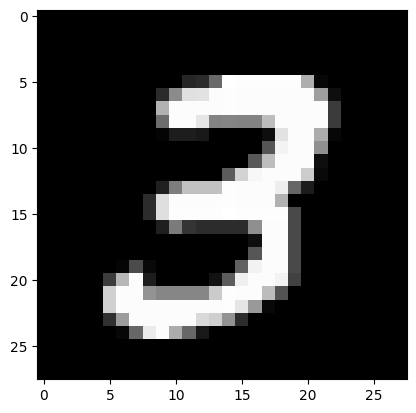

In [4]:
plt.imshow(train_X[7], cmap = 'gray')
print(train_Y[7])

In [5]:
num_classes = 10

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [8]:
train_Y[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
print(np.max(train_X[65]))

255


In [10]:
train_X = train_X/255
test_X = test_X/255

In [11]:
print(np.max(train_X[65]))

1.0


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


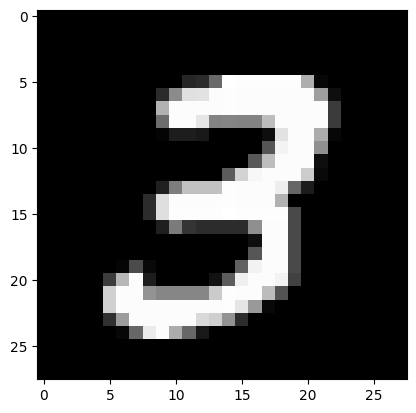

In [12]:
plt.imshow(train_X[7], cmap = 'gray')
print(train_Y[7])

In [13]:
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential(name = 'ANN_MNIST')
model.add(keras.layers.Flatten())
model.add(Dense(700,input_dim = (28 * 28), activation='relu',name='First_layer'))
model.add(Dense(500, activation='relu',name='Second_layer'))
model.add(Dense(250, activation='relu',name='third_layer'))
model.add(Dense(125, activation='relu',name='Fourth_layer'))
model.add(Dense(10, activation='softmax',name='tenth_layer'))

In [17]:
model.build((None, 784))
model.summary()

Model: "ANN_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 First_layer (Dense)         (None, 700)               549500    
                                                                 
 Second_layer (Dense)        (None, 500)               350500    
                                                                 
 third_layer (Dense)         (None, 250)               125250    
                                                                 
 Fourth_layer (Dense)        (None, 125)               31375     
                                                                 
 tenth_layer (Dense)         (None, 10)                1260      
                                                                 
Total params: 1057885 (4.04 MB)
Trainable params: 1057885

In [18]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
hist = model.fit(train_X, train_Y, batch_size = 100, epochs = 20, validation_split = 0.1)

Epoch 1/20
540/540 [==============================] - 14s 23ms/step - loss: 0.2238 - accuracy: 0.9319 - val_loss: 0.1008 - val_accuracy: 0.9697
Epoch 2/20
540/540 [==============================] - 12s 23ms/step - loss: 0.0897 - accuracy: 0.9729 - val_loss: 0.0938 - val_accuracy: 0.9722
Epoch 3/20
540/540 [==============================] - 12s 22ms/step - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0832 - val_accuracy: 0.9782
Epoch 4/20
540/540 [==============================] - 13s 23ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0918 - val_accuracy: 0.9747
Epoch 5/20
540/540 [==============================] - 13s 24ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0849 - val_accuracy: 0.9770
Epoch 6/20
540/540 [==============================] - 12s 22ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0756 - val_accuracy: 0.9795
Epoch 7/20
540/540 [==============================] - 12s 23ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0716 - val_accuracy:

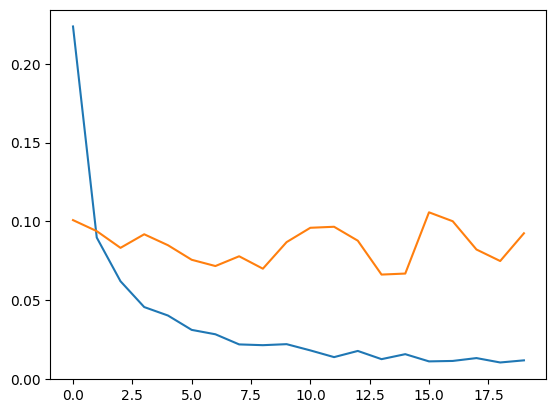

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

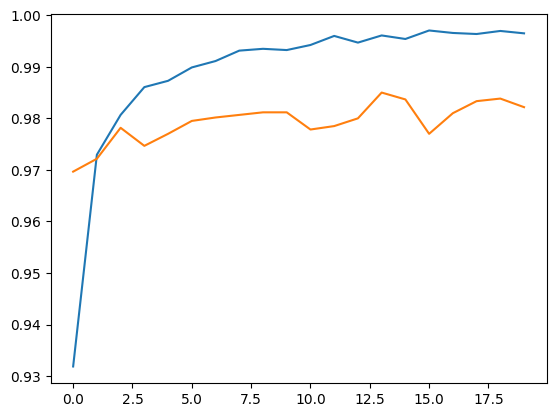

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

1/1 [==============================] - 0s 118ms/step
2
2


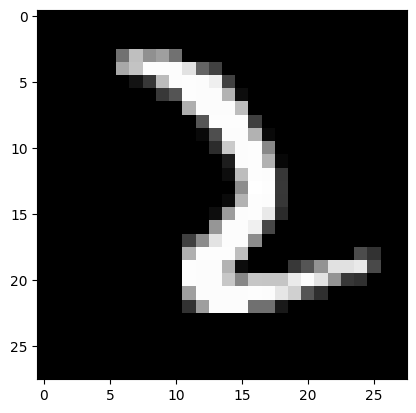

In [22]:
print(np.argmax(model.predict(test_X[653].reshape(1, 28, 28))))
plt.imshow(test_X[653], cmap = 'gray')
print(np.argmax(test_Y[653]))

In [23]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 2s 4ms/step - loss: 0.1104 - accuracy: 0.9803


[0.1104142814874649, 0.9803000092506409]